Thanks this guide : https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read the data
df = pd.read_csv('datascc.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(2634, 7)
date                object
SCC.BK.Open        float64
SCC.BK.High        float64
SCC.BK.Low         float64
SCC.BK.Close       float64
SCC.BK.Volume      float64
SCC.BK.Adjusted    float64
dtype: object
['SCC.BK.Open' 'SCC.BK.High' 'SCC.BK.Low' 'SCC.BK.Close' 'SCC.BK.Volume'
 'SCC.BK.Adjusted']
['date']


# Check missing data

Technique #1: Missing Data Heatmap

When there is a smaller number of features, we can visualize the missing data via heatmap.

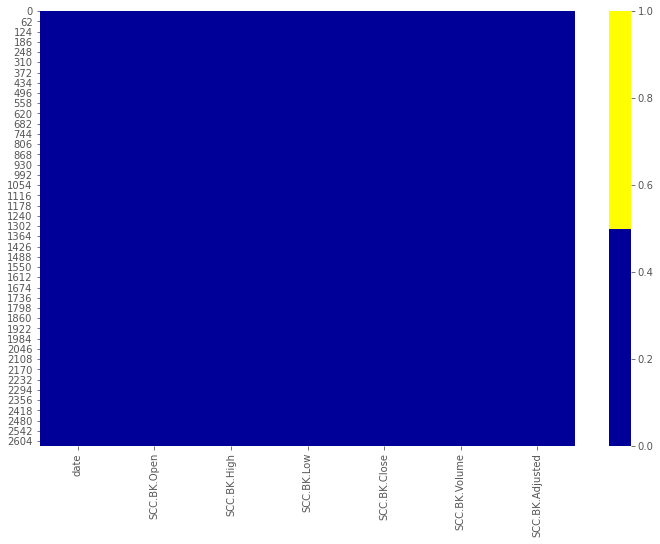

In [2]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Technique #2: Missing Data Percentage List

When there are many features in the dataset, we can make a list of missing data % for each feature.


In [3]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    missing_values= np.sum(df[col].isnull())
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    print('missing values is :',missing_values)

date - 0.0%
missing values is : 0
SCC.BK.Open - 0.0%
missing values is : 3
SCC.BK.High - 0.0%
missing values is : 3
SCC.BK.Low - 0.0%
missing values is : 3
SCC.BK.Close - 0.0%
missing values is : 3
SCC.BK.Volume - 0.0%
missing values is : 3
SCC.BK.Adjusted - 0.0%
missing values is : 3


created missing indicator for: SCC.BK.Open
created missing indicator for: SCC.BK.High
created missing indicator for: SCC.BK.Low
created missing indicator for: SCC.BK.Close
created missing indicator for: SCC.BK.Volume
created missing indicator for: SCC.BK.Adjusted


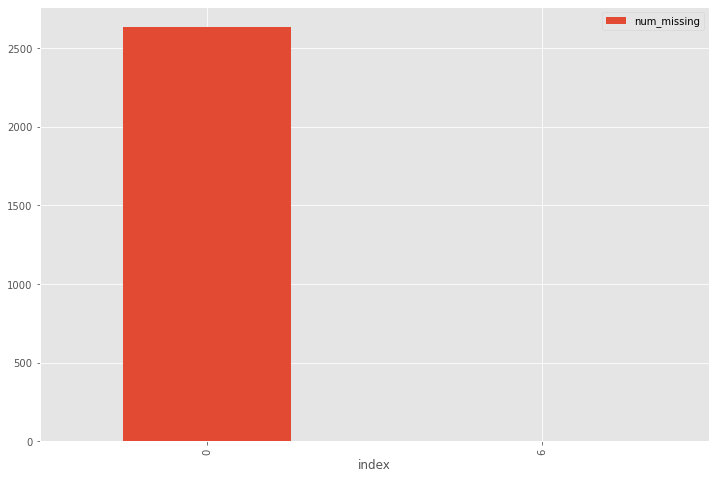

In [4]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

# dealing with missing data.

Solution #1: Drop the Observation
In statistics, this method is called the listwise deletion technique. In this solution, we drop the entire observation as long as it contains a missing value.


In [5]:
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

Solution #2: Drop the Feature
Similar to Solution #1,


we only do this when we are confident that this feature doesn’t provide useful information.
For example, from the missing data % list, we notice that hospital_beds_raion has a high missing value percentage of 47%. We may drop the entire feature.

Solution #3: Impute the Missing


When the feature is a numeric variable, we can conduct missing data imputation. We replace the missing values with the average or median value from the data of the same feature that is not missing.
When the feature is a categorical variable, we may impute the missing data by the mode (the most frequent value).
Using life_sq as an example, we can replace the missing values of this feature by its median.

# fill with median

In [6]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: SCC.BK.Open
imputing missing values for: SCC.BK.High
imputing missing values for: SCC.BK.Low
imputing missing values for: SCC.BK.Close
imputing missing values for: SCC.BK.Volume
imputing missing values for: SCC.BK.Adjusted


# fill with mode

In [7]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

Solution #4: Replace the Missing


For categorical features, we can add a new category with a value such as “_MISSING_”. For numerical features, we can replace it with a particular value such as -999.
This way, we are still keeping the missing values as valuable information.

In [8]:
# # categorical
# df['sub_area'] = df['sub_area'].fillna('_MISSING_')


# # numeric
# df['life_sq'] = df['life_sq'].fillna(-999)

# Irregular data (Outliers)

Technique #1: Histogram/Box Plot


When the feature is numeric, we can use a histogram and box plot to detect outliers.

In [9]:
for col in df.columns:
    print(col)

date
SCC.BK.Open
SCC.BK.High
SCC.BK.Low
SCC.BK.Close
SCC.BK.Volume
SCC.BK.Adjusted
SCC.BK.Open_ismissing
SCC.BK.High_ismissing
SCC.BK.Low_ismissing
SCC.BK.Close_ismissing
SCC.BK.Volume_ismissing
SCC.BK.Adjusted_ismissing
num_missing


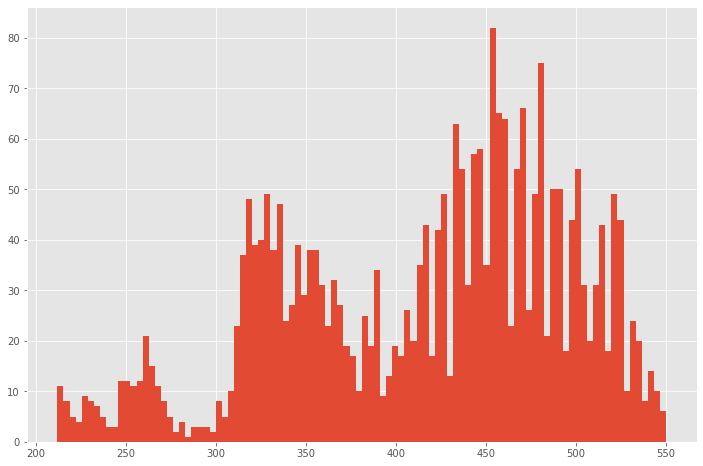

In [10]:
# histogram of life_sq.
df['SCC.BK.Open'].hist(bins=100)

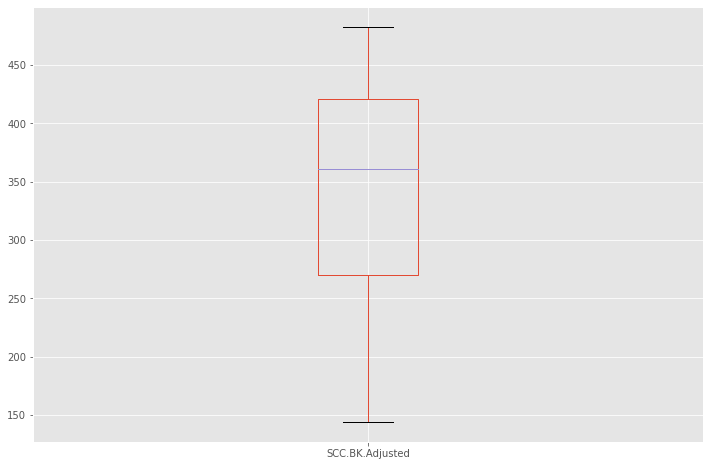

In [11]:
# box plot.
df.boxplot(column=['SCC.BK.Adjusted'])

In [12]:
df['SCC.BK.Adjusted'].describe()

count    2634.000000
mean      347.206996
std        83.252166
min       144.159332
25%       269.956001
50%       360.983490
75%       420.774422
max       482.873840
Name: SCC.BK.Adjusted, dtype: float64

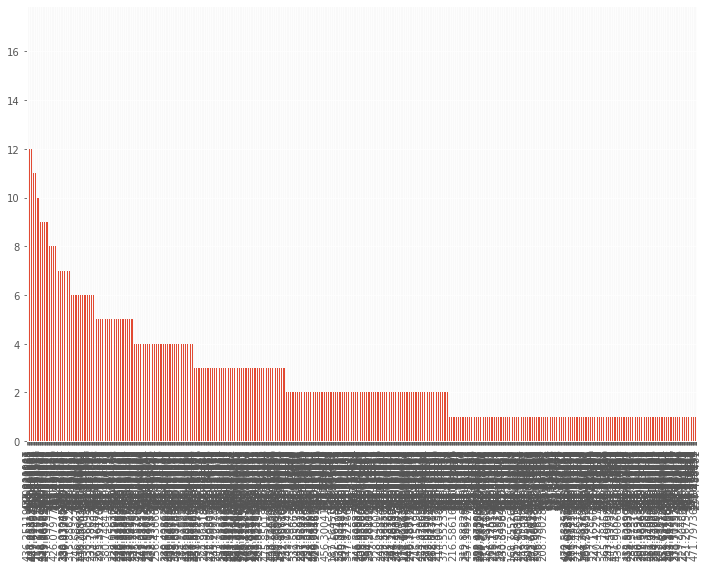

In [13]:
# bar chart -  distribution of a categorical variable
df['SCC.BK.Adjusted'].value_counts().plot.bar()

# Unnecessary type #1: Uninformative / Repetitive

# How to find out?


We can create a list of features with a high percentage of the same value.
For example, we specify below to show features with over 95% rows being the same value.


In [14]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

SCC.BK.Open_ismissing: 99.88610%
False    2631
True        3
Name: SCC.BK.Open_ismissing, dtype: int64

SCC.BK.High_ismissing: 99.88610%
False    2631
True        3
Name: SCC.BK.High_ismissing, dtype: int64

SCC.BK.Low_ismissing: 99.88610%
False    2631
True        3
Name: SCC.BK.Low_ismissing, dtype: int64

SCC.BK.Close_ismissing: 99.88610%
False    2631
True        3
Name: SCC.BK.Close_ismissing, dtype: int64

SCC.BK.Volume_ismissing: 99.88610%
False    2631
True        3
Name: SCC.BK.Volume_ismissing, dtype: int64

SCC.BK.Adjusted_ismissing: 99.88610%
False    2631
True        3
Name: SCC.BK.Adjusted_ismissing, dtype: int64

num_missing: 99.88610%
0    2631
6       3
Name: num_missing, dtype: int64



# Inconsistent data
It is also crucial to have the dataset follow specific standards to fit a model. We need to explore the data in different ways to find out the inconsistent data. Much of the time, it depends on observations and experience. There is no set code to run and fix them all.
Below we cover four inconsistent data types.


Inconsistent type #1: Capitalization
Inconsistent usage of upper and lower cases in categorical values is a common mistake. It could cause issues since analyses in Python is case sensitive.

In [15]:
# # make everything lower case.
# df['sub_area_lower'] = df['sub_area'].str.lower()
# df['sub_area_lower'].value_counts(dropna=False)
df.head()

,date,SCC.BK.Open,SCC.BK.High,SCC.BK.Low,SCC.BK.Close,SCC.BK.Volume,SCC.BK.Adjusted,SCC.BK.Open_ismissing,SCC.BK.High_ismissing,SCC.BK.Low_ismissing,SCC.BK.Close_ismissing,SCC.BK.Volume_ismissing,SCC.BK.Adjusted_ismissing,num_missing
0,2010-01-04,236.0,236.0,232.0,233.0,877400.0,159.190170,False,False,False,False,False,False,0
1,2010-01-05,235.0,236.0,231.0,233.0,1117100.0,159.190170,False,False,False,False,False,False,0
2,2010-01-06,233.0,234.0,229.0,230.0,1167600.0,157.140518,False,False,False,False,False,False,0
3,2010-01-07,231.0,231.0,225.0,226.0,1832200.0,154.407623,False,False,False,False,False,False,0
4,2010-01-08,226.0,230.0,225.0,227.0,2917000.0,155.090866,False,False,False,False,False,False,0


Inconsistent type #2: Formats

Another standardization we need to perform is the data formats. One example is to convert the feature from string to DateTime format.

In [16]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] =df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2013    245
2018    245
2014    245
2012    245
2019    244
2015    244
2011    244
2016    244
2010    244
2017    242
2020    192
Name: year, dtype: int64

3     238
9     233
6     231
8     230
1     228
7     222
10    217
2     216
11    215
5     212
4     200
12    192
Name: month, dtype: int64


Inconsistent type #3: Categorical Values


Inconsistent categorical values are the last inconsistent type we cover. A categorical feature has a limited number of values. Sometimes there may be other values due to reasons such as typos.


How to find out?


We need to observe the feature to find out this inconsistency. Let’s show this with an example.
We create a new dataset below since we don’t have such a problem in the real estate dataset. For instance, the value of city was typed by mistakes as “torontoo” and “tronto”. But they both refer to the correct value “toronto”.
A simple way to identify them is fuzzy logic (or edit distance). It measures how many letters (distance) we need to change the spelling of one value to match with another value.
We know that the categories should only have four values of “toronto”, “vancouver”, “montreal”, and “calgary”. We calculate the distance between all the values and the word “toronto” (and “vancouver”). We can see that the ones likely to be typos have a smaller distance with the correct word. Since they only differ by a couple of letters.

In [17]:
# from nltk.metrics import edit_distance

# df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


# df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
# df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
# df_city_ex

What to do?


We can set criteria to convert these typos to the correct values. For example, the below code sets all the values within 2 letters distance from “toronto” to be “toronto”.

In [18]:
# msk = df_city_ex['city_distance_toronto'] <= 2
# df_city_ex.loc[msk, 'city'] = 'toronto'

# msk = df_city_ex['city_distance_vancouver'] <= 2
# df_city_ex.loc[msk, 'city'] = 'vancouver'

# df_city_ex

Inconsistent type #4: Addresses


The address feature could be a headache for many of us. Because people entering the data into the database often don’t follow a standard format.

In [19]:
# # no address column in the housing dataset. So create one to show the code.
# df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
# df_add_ex


# What to do?
# We run the below code to lowercase the letters, remove white space, delete periods and standardize wordings.
# df_add_ex['address_std'] = df_add_ex['address'].str.lower()
# df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
# df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
# df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
# df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
# df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

# df_add_ex